In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [42]:
import tf_keras
from pathlib import Path

In [7]:
print(tf.__version__)
print(hub.__version__)

2.16.2
0.16.1


In [8]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = mobilenet_v2
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [31]:
img = Image.open("img.JPG").resize(IMAGE_SHAPE)

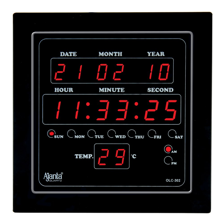

In [32]:
img

In [33]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [34]:
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [35]:
img[np.newaxis, ...].shape

(1, 224, 224, 3)

In [36]:
res = classifier.predict(img[np.newaxis, ...])
res.shape

1/1 [==============================] - 0s 70ms/step


(1, 1001)

In [37]:
prediction_label_index = np.argmax(res)
prediction_label_index

531

In [38]:
image_label = []
with open("ImageNetLabels.txt") as f:
    image_label = f.read().splitlines()




In [39]:
print(f"the predicted value is {image_label[prediction_label_index]}")

the predicted value is digital clock


### download the datset

In [40]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 346s 2us/step


In [55]:
# data_dir  ="datasets/flower_photos"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
print(data_dir)
data_dir = Path(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

./datasets/flower_photos


[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [44]:
print(f"the value of images count is {len(list(data_dir.glob('*/*.jpg')))}")

the value of images count is 3670


In [47]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

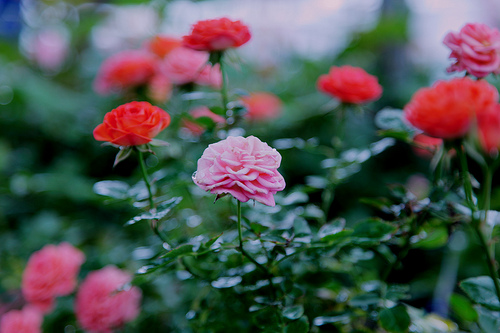

In [57]:
Image.open(str(roses[1]))

In [58]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [59]:
X = []
y = []

for flowerName, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resize_img)
        y.append(flowers_labels_dict[flowerName])




In [61]:
X = np.array(X)
y = np.array(y)


In [62]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [63]:
Xtrain_scaled = Xtrain/255.0
Xtest_scaled = Xtest/255.0

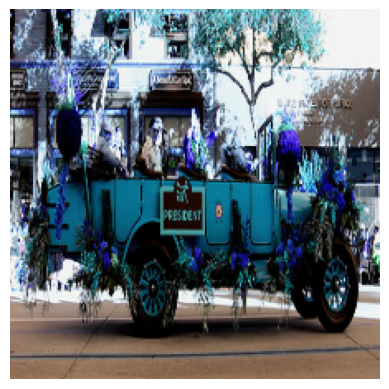

In [65]:
plt.axis('off')
plt.imshow(X[0])

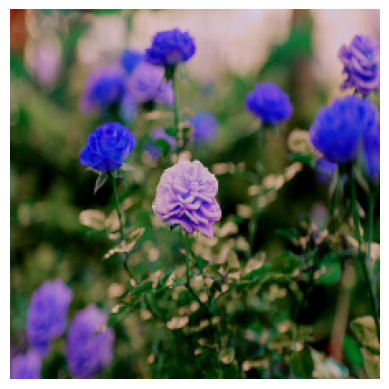

In [66]:
plt.axis('off')
plt.imshow(X[1])

### taking the model without the last layer

In [83]:
#downloading ht pretrained model and freezing all the parameters

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


TypeError: Sequential.__init__() got an unexpected keyword argument 'input_shape'

In [82]:
num_of_flower = 5

model = tf.keras.Sequential(
   [ pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flower)]
)

TypeError: The added layer must be an instance of class Layer. Received: layer=<Dense name=dense_7, built=False> of type <class 'keras.src.layers.core.dense.Dense'>.

In [80]:
pretrained_model_without_top_layer

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x136125c00> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)